<a href="https://colab.research.google.com/github/CharuniPremarathne/Assignment_DL/blob/main/Mask_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downloading Kaggle Data sets directory into Colab**

In [ ]:
pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
mkdir ~/.kaggle          #create a hidden folder in root directory

In [ ]:
cp /content/......... /kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [ ]:
chmod 600 ~/.kaggle/kaggle.json

Downloading data sets

In [ ]:
kaggle datasets download hamishcrazeai/maize-in-field-dataset

Model Training

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 28.47 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [ ]:
import os
os.chdir('Mask_RCNN/samples')

In [ ]:
import sys

In [ ]:
ROOT_DIR = os.path.abspath("../")

In [ ]:
sys.path.append(ROOT_DIR)
from Mask_RCNN.mrcnn import utils


In [ ]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from Mask_RCNN.mrcnn.utils import Dataset
from matplotlib import pyplot
from Mask_RCNN.mrcnn.visualize import display_instances
from Mask_RCNN.mrcnn.utils import extract_bboxes

from Mask_RCNN.mrcnn.config import Config



**Load the Dataset**

In [ ]:
#images_path = "dataset/images.zip"
#annotation_path = "dataset/annots.zip"

#!unzip(os.path.join("content", images_path), "/content/dataset/train/images")
!unzip "/content/dataset/images.zip" -d "/content/dataset/train/images"
!unzip "/content/dataset/annots.zip" -d "/content/dataset/train/annots"

In [ ]:
!unzip "/content/dataset/annots.zip" -d "/content/dataset/train/annots"

In [37]:
class AppleLeafDataset(Dataset):
    # load the dataset definitions
    def load_dataset(self, dataset_dir, is_train=True):
        # define classes
        self.add_class("dataset", 1, "Black Rot")
        self.add_class("dataset", 2, "Apple Scab")
        self.add_class("dataset", 3, "Cedar Apple")

        # define data locations
        images_dir = dataset_dir + '/images/images/'
        annotations_dir = dataset_dir + '/annots/annots/'


		# find all images
        for filename in listdir(images_dir):
            print(filename)
			# extract image id
            image_id = filename[:-4]
			#print('IMAGE ID: ',image_id)

			# skip all images after 115 if we are building the train set
            if is_train and int(image_id) >= 250:
                continue
			# skip all images before 115 if we are building the test/val set
            if not is_train and int(image_id) < 250:
                continue
            img_path = images_dir + filename
            ann_path = annotations_dir + image_id + '.xml'
			# add to dataset
            self.add_image('dataset', image_id=image_id, path=img_path, annotation=ann_path, class_ids = [0,1,2,3])


	# extract bounding boxes from an annotation file
    def extract_boxes(self, filename):
		# load and parse the file
        tree = ElementTree.parse(filename)
		# get the root of the document
        root = tree.getroot()
		# extract each bounding box
        boxes = list()
        for box in root.findall('.//object'):
            name = box.find('name').text   #Add label name to the box list
            xmin = int(box.find('./bndbox/xmin').text)
            ymin = int(box.find('./bndbox/ymin').text)
            xmax = int(box.find('./bndbox/xmax').text)
            ymax = int(box.find('./bndbox/ymax').text)
            coors = [xmin, ymin, xmax, ymax, name]
            boxes.append(coors)
		# extract image dimensions
        width = int(root.find('.//size/width').text)
        height = int(root.find('.//size/height').text)
        return boxes, width, height

	# load the masks for an image
    def load_mask(self, image_id):
		# get details of image
        info = self.image_info[image_id]
		# define box file location
        path = info['annotation']
        #return info, path


		# load XML
        boxes, w, h = self.extract_boxes(path)
		# create one array for all masks, each on a different channel
        masks = zeros([h, w, len(boxes)], dtype='uint8')
		# create masks
        class_ids = list()
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]


            # box[4] will have the name of the class
            if (box[4] == 'Black Rot'):
                masks[row_s:row_e, col_s:col_e, i] = 1
                class_ids.append(self.class_names.index('Black Rot'))
            elif(box[4] == 'Apple Scab'):
                masks[row_s:row_e, col_s:col_e, i] = 2
                class_ids.append(self.class_names.index('Apple Scab'))
            elif(box[4] == 'Cedar Apple'):
                masks[row_s:row_e, col_s:col_e, i] = 3
                class_ids.append(self.class_names.index('Cedar Apple'))

        return masks, asarray(class_ids, dtype='int32')


	# load an image reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']


234.JPG
374.JPG
655.JPG
204.JPG
747.JPG
100.JPG
602.JPG
677.JPG
49.JPG
762.JPG
346.JPG
585.JPG
90.JPG
18.JPG
168.JPG
27.JPG
380.JPG
430.JPG
597.JPG
9.JPG
86.JPG
627.JPG
170.JPG
42.JPG
774.JPG
350.JPG
39.JPG
688.JPG
768.JPG
198.JPG
398.JPG
634.JPG
123.JPG
137.JPG
116.JPG
105.JPG
3.JPG
50.JPG
81.JPG
765.JPG
128.JPG
60.JPG
230.JPG
327.JPG
619.JPG
131.JPG
122.JPG
733.JPG
216.JPG
322.JPG
465.JPG
568.JPG
217.JPG
106.JPG
358.JPG
745.JPG
35.JPG
658.JPG
474.JPG
595.JPG
72.JPG
704.JPG
93.JPG
702.JPG
188.JPG
410.JPG
592.JPG
473.JPG
82.JPG
711.JPG
623.JPG
372.JPG
395.JPG
479.JPG
319.JPG
608.JPG
736.JPG
760.JPG
654.JPG
231.JPG
325.JPG
700.JPG
195.JPG
739.JPG
656.JPG
606.JPG
488.JPG
210.JPG
25.JPG
455.JPG
202.JPG
63.JPG
686.JPG
717.JPG
201.JPG
417.JPG
445.JPG
629.JPG
637.JPG
628.JPG
5.JPG
477.JPG
609.JPG
425.JPG
77.JPG
207.JPG
166.JPG
480.JPG
723.JPG
644.JPG
554.JPG
192.JPG
719.JPG
642.JPG
148.JPG
779.JPG
744.JPG
569.JPG
748.JPG
351.JPG
326.JPG
626.JPG
453.JPG
670.JPG
108.JPG
770.JPG
120.JPG
237.JPG

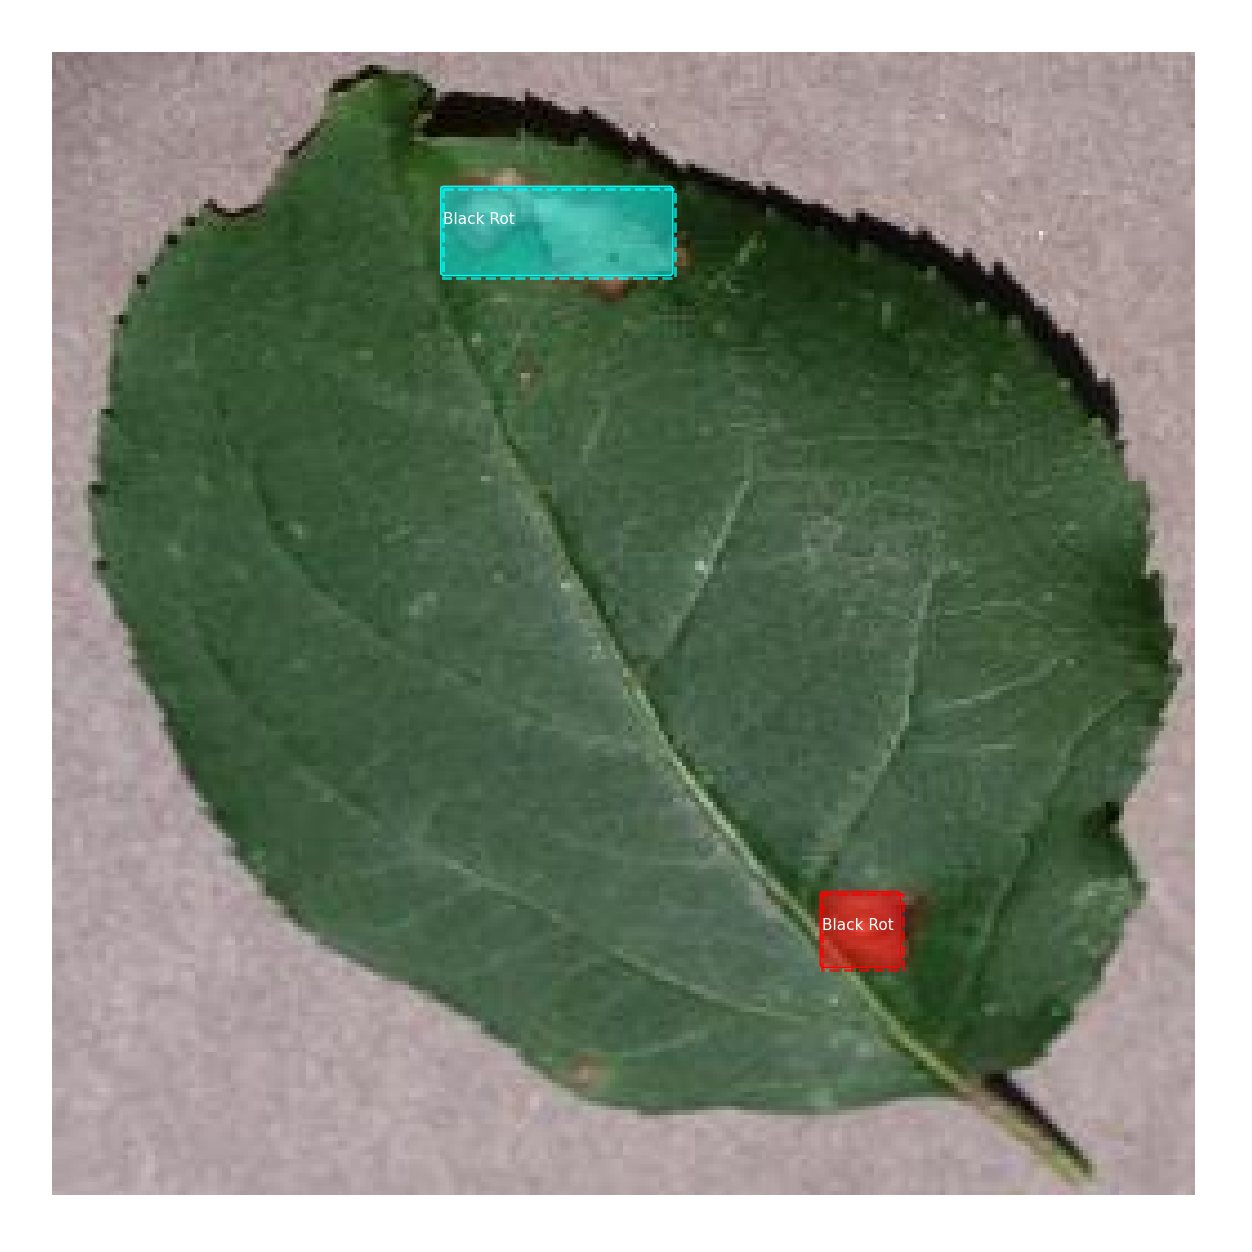

In [39]:
dataset_dir = "/content/dataset/train"
# train set
train_set = AppleLeafDataset()
train_set.load_dataset(dataset_dir, is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test/val set
test_set = AppleLeafDataset()
test_set.load_dataset(dataset_dir, is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

import random
num=random.randint(0, len(train_set.image_ids))
# define image id
image_id = num
# load the image
image = train_set.load_image(image_id)
# load the masks and the class ids
mask, class_ids = train_set.load_mask(image_id)
# extract bounding boxes from the masks
bbox = extract_bboxes(mask)
# display image with masks and bounding boxes
display_instances(image, bbox, mask, class_ids, train_set.class_names)

FileNotFoundError: ignored

**Training**

In [40]:
# define a configuration for the model
class AppleLeavesConfig(Config):
	# define the name of the configuration
	NAME = "object"

	NUM_CLASSES = 1 + 3
	# number of training steps per epoch
	STEPS_PER_EPOCH = 100

# prepare config
config = AppleLeavesConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [41]:
import os
ROOT_DIR = os.path.abspath("./")
# Directory to save logs and trained model
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

In [50]:
import keras
print(keras.__version__)

2.13.1


In [53]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.14.0 which is incompatible.


In [1]:
from Mask_RCNN.mrcnn.model import MaskRCNN

ModuleNotFoundError: ignored

In [46]:
# define the model
model = MaskRCNN(mode='training', model_dir="logs", config=config)
# load weights (mscoco) and exclude the output layers
model.load_weights("weights/mask_rcnn_coco.h5", by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])


# train weights (output layers or 'heads')
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=20, layers='heads')

NameError: ignored

In [ ]:
from matplotlib.patches import Rectangle

**Prediction**

In [ ]:
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "objects"

	NUM_CLASSES = 1 + 3

	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

In [ ]:
# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='logs', config=cfg)
# load model weights
model.load_weights('logs/mask_rcnn_fruits_cfg_0020.h5', by_name=True)

In [ ]:
import skimage

fruit_img = skimage.io.imread("datasets/fruit-bowl.jpg")
detected = model.detect([fruit_img])[0]

pyplot.imshow(fruit_img)
ax = pyplot.gca()
class_names = ['apple', 'banana', 'orange']
class_id_counter=1
for box in detected['rois']:
    #print(box)
#get coordinates
    detected_class_id = detected['class_ids'][class_id_counter-1]
    #print(detected_class_id)
    #print("Detected class is :", class_names[detected_class_id-1])
    y1, x1, y2, x2 = box
    #calculate width and height of the box
    width, height = x2 - x1, y2 - y1
    #create the shape
    ax.annotate(class_names[detected_class_id-1], (x1, y1), color='black', weight='bold', fontsize=10, ha='center', va='center')
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
#draw the box
    ax.add_patch(rect)
    class_id_counter+=1
#show the figure
pyplot.show()